In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [8]:
df2 = pd.read_csv("/content/movie_metadata.csv")
df2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [9]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
df2.isnull().sum()

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [11]:
numerical_col = df2.select_dtypes(include = ["float64","int64"]).columns
df2[numerical_col] = df2[numerical_col].fillna(df2[numerical_col].mean())
df2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.000000,855.000000,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.000000,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.000000,161.000000,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.000000,23000.000000,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,NaN,Doug Walker,140.194272,107.201074,131.000000,645.009761,Rob Walker,131.0,4.846841e+07,Documentary,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.000000,87.000000,2.000000,318.000000,Daphne Zuniga,637.0,4.846841e+07,Comedy|Drama,...,6.000000,English,Canada,NaN,3.975262e+07,2013.000000,470.0,7.7,2.220403,84
5039,Color,NaN,43.000000,43.000000,686.509212,319.000000,Valorie Curry,841.0,4.846841e+07,Crime|Drama|Mystery|Thriller,...,359.000000,English,USA,TV-14,3.975262e+07,2002.470517,593.0,7.5,16.000000,32000
5040,Color,Benjamin Roberds,13.000000,76.000000,0.000000,0.000000,Maxwell Moody,0.0,4.846841e+07,Drama|Horror|Thriller,...,3.000000,English,USA,NaN,1.400000e+03,2013.000000,0.0,6.3,2.220403,16
5041,Color,Daniel Hsia,14.000000,100.000000,0.000000,489.000000,Daniel Henney,946.0,1.044300e+04,Comedy|Drama|Romance,...,9.000000,English,USA,PG-13,3.975262e+07,2012.000000,719.0,6.3,2.350000,660


In [12]:
categorical_col = df2.select_dtypes(include = ["object"]).columns
for i in categorical_col:
  mode_val = df2[i].mode()[0]
  df2[i].fillna(mode_val,inplace =True)


<ipython-input-12-4189f9b1e7f2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[i].fillna(mode_val,inplace =True)


For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[i].fillna(mode_val,inplace =True)

In [13]:
df2.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


In [14]:
df2.shape

(5043, 28)

In [15]:
df2.drop_duplicates(inplace =True)
df2.shape

(4998, 28)

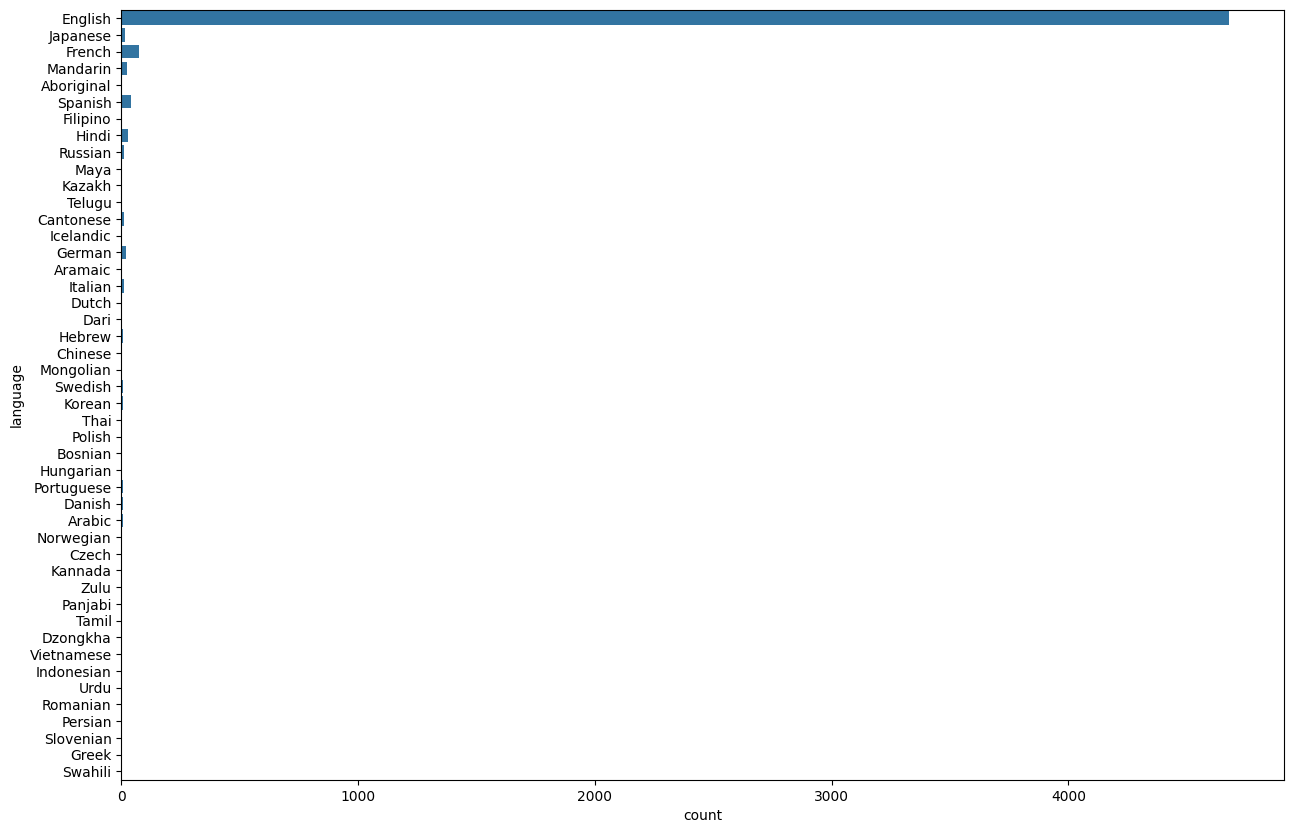

In [16]:
plt.figure(figsize = (15,10))
sns.countplot(df2["language"])
plt.show()

In [17]:
df2.drop("language",axis = 1,inplace =True)

In [18]:
df2.drop("color",axis = 1,inplace =True)

In [19]:
df2.columns,df2.shape

(Index(['director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'country', 'content_rating',
        'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
        'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'),
 (4998, 26))

In [20]:
df2["Profit"] = df2["budget"].sub(df2["gross"],axis=0)

In [21]:
df2.shape

(4998, 27)

In [22]:
categorical_col = df2.select_dtypes(include = ["object"]).columns
for j in categorical_col:
  df2[j] = df2[j].astype("category").cat.codes

In [23]:
X = df2.drop("imdb_score",axis=1)
Y = df2["imdb_score"]

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.8)

In [25]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(X_test)
print(y_pred)
rsme = np.sqrt(mean_squared_error(Y_test,y_pred))
print("Training_score:",reg.score(X_train,Y_train))
print("Testing_score:",reg.score(X_test,Y_test))
print("RSME:",rsme)

[6.24448274 6.39661676 6.26048153 ... 5.82787248 6.78763847 5.91249826]
Training_score: 0.3343640132599578
Testing_score: 0.2786706150713911
RSME: 0.9492721658570034


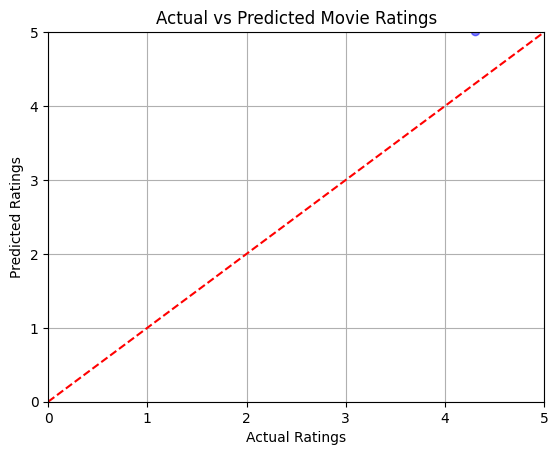

In [34]:
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Movie Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.plot([0, 5], [0, 5], color='red', linestyle='--')  # Identity line
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.grid(True)
plt.show()